# Group 2 Non Linear SVM

In [1]:
#import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [2]:
#reading the dataset
data = pd.read_csv("Group_2_data_cleaned.csv")

In [3]:
data

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,0,1,-1,1,-1,-1,1,1,1,0,0
1,1,-1,-1,-1,-1,-1,0,1,1,1,1
2,2,1,-1,0,0,-1,0,-1,1,0,1
3,3,1,0,1,-1,-1,0,1,1,0,0
4,4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1348,1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,1349,-1,0,1,0,-1,0,0,1,0,-1
1350,1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,1351,0,0,1,0,0,0,-1,1,0,1


In [4]:
#Dropping the unnamed column
data=data.drop('Unnamed: 0',axis=1)

In [5]:
#slicing the dataset
x = data.iloc[:,:-1]

In [6]:
y = data.iloc[:,-1]

In [7]:
y.value_counts()

-1    702
 1    548
 0    103
Name: Result, dtype: int64

<AxesSubplot:xlabel='Result'>

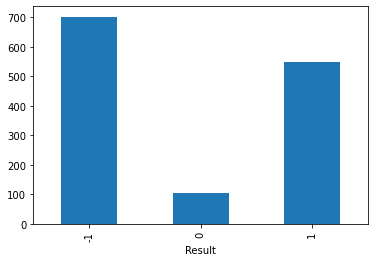

In [8]:
#Showing the class result on x-axis and count of 1,0,-1 on Y-axis
##unsampled data
data.pivot_table(index='Result', aggfunc='size').plot(kind='bar')

In [9]:
#splitting the train and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y,random_state=42,stratify=y, test_size=0.25 )

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [10]:
from imblearn.over_sampling import SMOTE
X_sampled, y_sampled= SMOTE().fit_resample(X_train_full,y_train_full)

<AxesSubplot:xlabel='Result'>

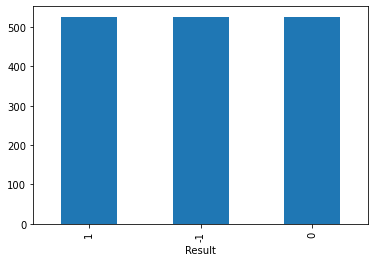

In [11]:
#distribution of target varaible after applying smote
pd.Series(y_sampled).value_counts().plot(kind='bar', xlabel='Result')

In [12]:
#Use StandardScaler
# sc= StandardScaler()
# X_sampled=sc.fit_transform(X_sampled)


In [13]:
#Now train the model
svm_classifier=SVC(kernel='rbf',probability=True)
svm_classifier.fit(X_sampled,y_sampled)
svm_classifier

SVC(probability=True)

In [14]:
#now predict
y_predict=svm_classifier.predict(X_valid)
y_predict

array([-1,  1, -1, -1, -1, -1, -1,  0,  1, -1,  1,  1,  1,  1, -1,  0, -1,
        1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  0,  1,  1, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  0,  1,
       -1,  1,  0,  0,  1, -1, -1, -1,  0,  1, -1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,
       -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  0, -1,  0,  1,  1,  1,
        1,  0, -1,  1, -1,  0, -1,  0, -1,  1,  1,  1,  1, -1,  1,  1,  0,
        1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  0,
       -1,  0, -1,  0, -1,  1, -1,  1,  1, -1, -1, -1, -1,  0, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  0,
        1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  0,
       -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  0,  1,
        1,  1,  1, -1,  0

In [15]:
#confusion matrix
cnf=confusion_matrix(y_valid,y_predict)
cnf

array([[121,   4,   9],
       [  0,  21,   0],
       [  5,   3,  91]], dtype=int64)

Text(0.5, 1.1, 'Confusion matrix')

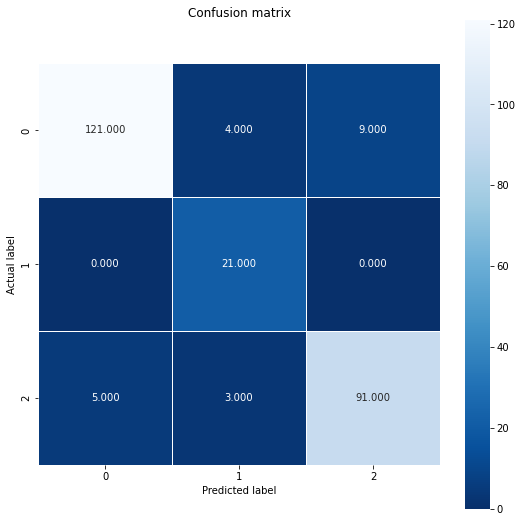

In [16]:
#plotting the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cnf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', y=1.1)

In [17]:
#Test score report
print(classification_report(y_valid, y_predict))

              precision    recall  f1-score   support

          -1       0.96      0.90      0.93       134
           0       0.75      1.00      0.86        21
           1       0.91      0.92      0.91        99

    accuracy                           0.92       254
   macro avg       0.87      0.94      0.90       254
weighted avg       0.92      0.92      0.92       254



##  SVM with Linear kernel

In [18]:
model_svc = SVC(kernel="linear", C=1000)
model_svc.fit(X_sampled, y_sampled)

SVC(C=1000, kernel='linear')

In [19]:
y_pred_lin = model_svc.predict(X_valid)
accuracy_score(y_valid, y_pred_lin)

0.8307086614173228

In [20]:
cnf_lin=confusion_matrix(y_valid, y_pred_lin)
cnf_lin
# print(classification_report(y_valid, y_pred_lin))

array([[110,  15,   9],
       [  0,  19,   2],
       [  9,   8,  82]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

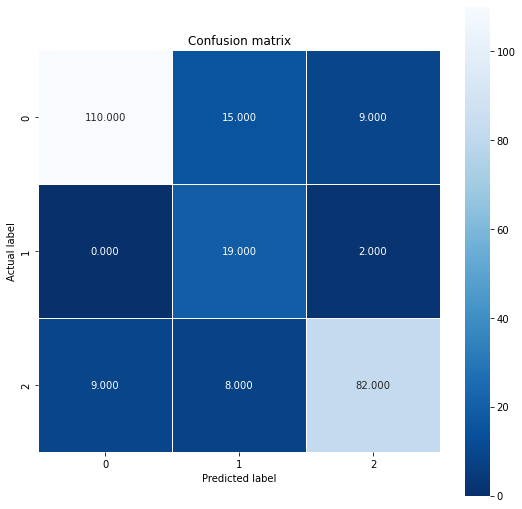

In [21]:
#plotting the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cnf_lin, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix')

In [22]:
#Test score report
print(classification_report(y_valid, y_pred_lin))

              precision    recall  f1-score   support

          -1       0.92      0.82      0.87       134
           0       0.45      0.90      0.60        21
           1       0.88      0.83      0.85        99

    accuracy                           0.83       254
   macro avg       0.75      0.85      0.78       254
weighted avg       0.87      0.83      0.84       254



# Model Structure Selection using Grid Search

##

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'linear']}

g = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
g

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [24]:
g.fit(X_sampled, y_sampled)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.858 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.911 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.927 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.918 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.883 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.911 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.769 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.835 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.832 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.851 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.844 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.759 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.832 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.753 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.819 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.1s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.557 total time=   0.1s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.551 total time=   0.1s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.573 total time=   0.0s
[CV 4/5] END ......C=1, gamm

[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.803 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.775 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.832 total time=   0.1s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.813 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.844 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.844 total time=   0.1s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.715 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.2s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.756 total time=   0.2s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.765 total time=   0.2s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.768 total time=   0.2s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.557 total time=   0.1s
[CV 2/5] END ...C=10, gamma=

[CV 2/5] END ......C=1000, gamma=1, kernel=poly;, score=0.918 total time=   4.5s
[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=0.915 total time=   2.4s
[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.879 total time=   2.6s
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.930 total time=   2.9s
[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.766 total time=   4.4s
[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.832 total time=   5.0s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.820 total time=   4.2s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.844 total time=   6.3s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.844 total time=   3.9s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.937 total time=   0.0s
[CV 4/5] END .....C=1000, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [25]:
#estimator which gave highest score
g.best_estimator_

SVC(C=1, gamma=1)

In [26]:
print(g.best_params_)

print(g.best_score_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9309302792847097


In [27]:
print(classification_report(y_valid,g.predict(X_valid)))

              precision    recall  f1-score   support

          -1       0.98      0.93      0.95       134
           0       0.84      1.00      0.91        21
           1       0.94      0.96      0.95        99

    accuracy                           0.95       254
   macro avg       0.92      0.96      0.94       254
weighted avg       0.95      0.95      0.95       254



<AxesSubplot:>

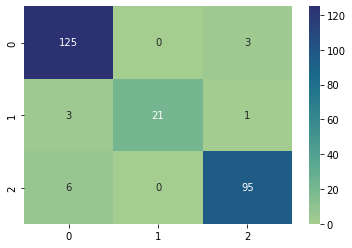

In [28]:
cm = confusion_matrix(g.predict(X_valid), y_valid)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="crest" ,fmt='g')

In [33]:
best_parameters_grid = grid_search.best_params_
best_parameters_grid

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [34]:
model_best = SVC(kernel=best_parameters_grid['kernel'], gamma=best_parameters_grid['gamma'],C=best_parameters_grid['C'])
model_best.fit(X_sampled, y_sampled)

SVC(C=1, gamma=1)